Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
* Murder -- Muder rates in different places of United States
* Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States


In [1133]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [1134]:
#Importing the data
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [1135]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [1136]:
#Drop the Colum
crime_data.drop(columns=["Unnamed: 0"],axis=1,inplace=True)


In [1137]:
#Standardizing the data 
std = StandardScaler()
crime_std = std.fit_transform(crime_data)
crime_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [1138]:
crime_std = pd.DataFrame(crime_std)
crime_std.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# K-means Clustring

Text(0.5, 1.0, 'ELBOW method to find K')

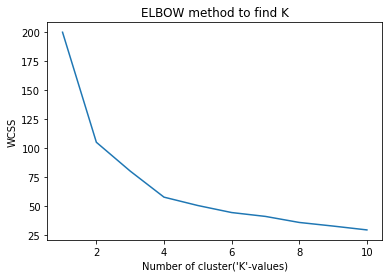

In [1139]:
# Finding the correct "K" value
WCSS = [] #list of Within cluster Sum of Squares
for i in range(1,11):   # trying k value from 1 to 10
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(crime_std)
    WCSS.append(kmeans.inertia_)

# Ploting WCSS VS K 
plt.plot(range(1,11),WCSS)
plt.xlabel("Number of cluster('K'-values)")
plt.ylabel("WCSS")
plt.title("ELBOW method to find K")


In [1140]:
# Bulding the model by considering K = 4
clusters_kmeans_4 = KMeans(4,random_state=42)
clusters_kmeans_4 = clusters_kmeans_4.fit(crime_std)
clusters_kmeans_4.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [1141]:
crime_data["KMeans_4"] = clusters_kmeans_4.labels_
crime_data.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


In [1142]:
crime_data.groupby("KMeans_4").agg(("mean"))

,Murder,Assault,UrbanPop,Rape
KMeans_4,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


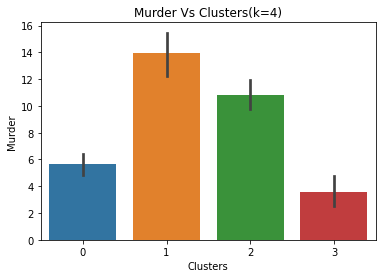

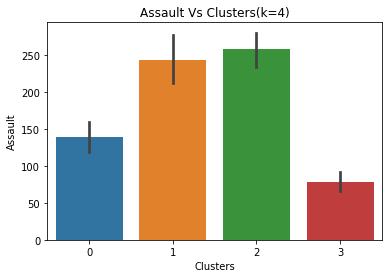

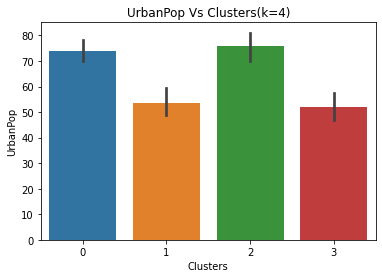

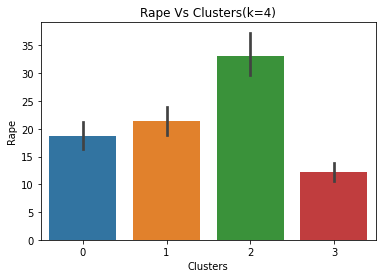

In [1143]:
for i in range(0,4):
    sns.barplot(y=crime_data.iloc[:,i],x=crime_data["KMeans_4"])
    plt.xlabel("Clusters")
    plt.ylabel(crime_data.columns[i])
    plt.title(f"{crime_data.columns[i]} Vs Clusters(k=4)")
    plt.show()
    

In [1144]:
# Bulding the model by considering K = 3
clusters_kmeans_3 = KMeans(3,random_state=42)
clusters_kmeans_3 = clusters_kmeans_3.fit(crime_std)
clusters_kmeans_3.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [1145]:
crime_data["KMeans_3"] = clusters_kmeans_3.labels_
crime_data.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4,KMeans_3
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,2,1
2,8.1,294,80,31.0,2,1
3,8.8,190,50,19.5,1,2
4,9.0,276,91,40.6,2,1


In [1146]:
crime_data.groupby("KMeans_3").agg(("mean"))

,Murder,Assault,UrbanPop,Rape,KMeans_4
KMeans_3,,,,,
0,5.656250,138.875,73.875000,18.78125,0.000000
1,12.165000,255.250,68.400000,29.16500,1.650000
2,3.971429,86.500,51.928571,12.70000,2.857143


Interpretation when k=4

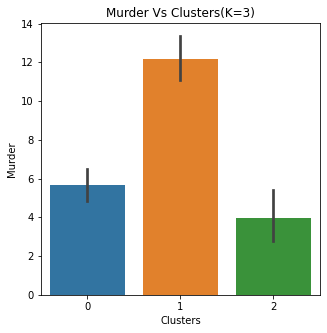

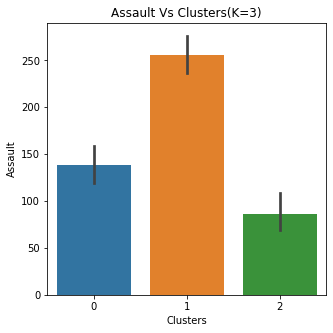

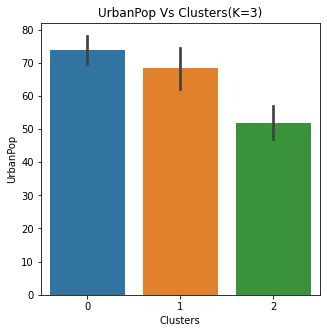

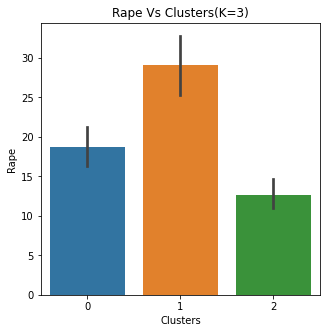

In [1147]:
for i in range(0,4):
    plt.figure(figsize=(5,5))
    sns.barplot(y=crime_data.iloc[:,i],x=crime_data["KMeans_3"])
    plt.xlabel("Clusters")
    plt.ylabel(crime_data.columns[i])
    plt.title(f"{crime_data.columns[i]} Vs Clusters(K=3)")
    plt.show()

Interpretation when k=4

# Hirarchical Clustering

In [1148]:
import scipy.cluster.hierarchy as sch

In [1149]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4,KMeans_3
0,13.2,236,58,21.2,1,1
1,10.0,263,48,44.5,2,1
2,8.1,294,80,31.0,2,1
3,8.8,190,50,19.5,1,2
4,9.0,276,91,40.6,2,1


In [1150]:
#Scaling the data by normalizing 
def normalize(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

crime_data_nor = normalize(crime_data.iloc[:,:4])
crime_data_nor

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [1151]:
crime_data.iloc[:,i]

0     21.2
1     44.5
2     31.0
3     19.5
4     40.6
5     38.7
6     11.1
7     15.8
8     31.9
9     25.8
10    20.2
11    14.2
12    24.0
13    21.0
14    11.3
15    18.0
16    16.3
17    22.2
18     7.8
19    27.8
20    16.3
21    35.1
22    14.9
23    17.1
24    28.2
25    16.4
26    16.5
27    46.0
28     9.5
29    18.8
30    32.1
31    26.1
32    16.1
33     7.3
34    21.4
35    20.0
36    29.3
37    14.9
38     8.3
39    22.5
40    12.8
41    26.9
42    25.5
43    22.9
44    11.2
45    20.7
46    26.2
47     9.3
48    10.8
49    15.6
Name: Rape, dtype: float64

In [1152]:
sch.linkage(crime_data_nor,method="complete") 
# methods 
# Single(closest dist btw  pts)
# complete(farest dist btw pts),
# avarage(Avarage dist btw pt)
# centroid(dist btw centroids)

array([[1.40000000e+01, 2.80000000e+01, 4.99862313e-02, 2.00000000e+00],
       [1.20000000e+01, 3.10000000e+01, 8.71860232e-02, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 1.07560045e-01, 2.00000000e+00],
       [2.20000000e+01, 4.80000000e+01, 1.24475500e-01, 2.00000000e+00],
       [1.90000000e+01, 3.00000000e+01, 1.32688717e-01, 2.00000000e+00],
       [3.50000000e+01, 4.50000000e+01, 1.44578065e-01, 2.00000000e+00],
       [3.60000000e+01, 4.60000000e+01, 1.48312560e-01, 2.00000000e+00],
       [1.80000000e+01, 5.00000000e+01, 1.64643019e-01, 3.00000000e+00],
       [4.00000000e+01, 4.70000000e+01, 1.78647476e-01, 2.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 1.80637986e-01, 3.00000000e+00],
       [2.50000000e+01, 2.60000000e+01, 1.85305888e-01, 2.00000000e+00],
       [3.40000000e+01, 3.70000000e+01, 1.91633219e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.96467627e-01, 2.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.98104543e

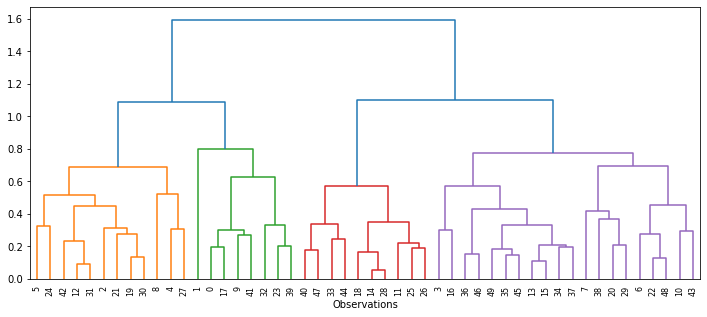

In [1153]:
# create the dendogram
plt.figure(figsize=(12,5)) 
sch.dendrogram(sch.linkage(crime_data_nor,method="complete"),color_threshold=1)
plt.xlabel("Observations")
plt.show()

In [1154]:
#To create Hierarchical clustring
hierar_cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="complete")
hierar_cluster.fit_predict(crime_data_nor)

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [1155]:
crime_data["Hierar_clusert_K(4)"] =hierar_cluster.labels_
crime_data.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4,KMeans_3,Hierar_clusert_K(4)
0,13.2,236,58,21.2,1,1,0
1,10.0,263,48,44.5,2,1,0
2,8.1,294,80,31.0,2,1,3
3,8.8,190,50,19.5,1,2,1
4,9.0,276,91,40.6,2,1,3


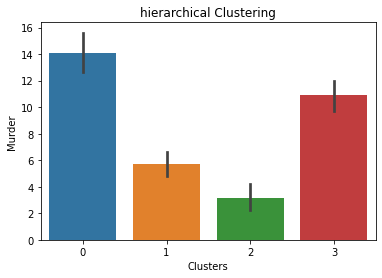

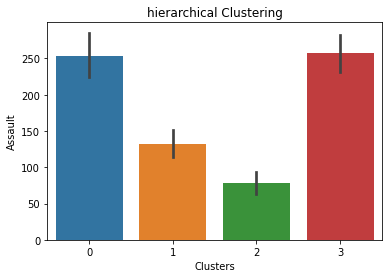

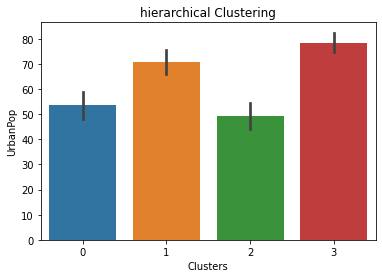

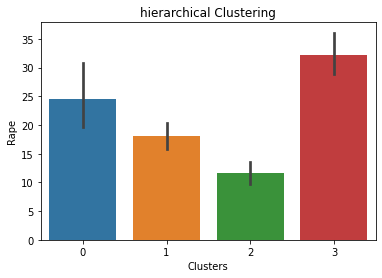

In [1156]:
for i in range(0,4):
    sns.barplot(y=crime_data.iloc[:,i],x=crime_data["Hierar_clusert_K(4)"])
    plt.xlabel("Clusters")
    plt.ylabel(crime_data.columns[i])
    plt.title(f"hierarchical Clustering")
    plt.show()

# DBSCAN Clustering

In [1157]:
crime_data_nor.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [1158]:
dbscan = DBSCAN(eps=0.2,min_samples=3)
dbscan.fit(crime_data_nor)
# dbscan.fit_predict(crime_data_nor)

DBSCAN(eps=0.2, min_samples=3)

In [1159]:
crime_data["DBSCAN_E(0.8)_MS(3)"] = dbscan.labels_
crime_data.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4,KMeans_3,Hierar_clusert_K(4),DBSCAN_E(0.8)_MS(3)
0,13.2,236,58,21.2,1,1,0,-1
1,10.0,263,48,44.5,2,1,0,-1
2,8.1,294,80,31.0,2,1,3,-1
3,8.8,190,50,19.5,1,2,1,-1
4,9.0,276,91,40.6,2,1,3,-1


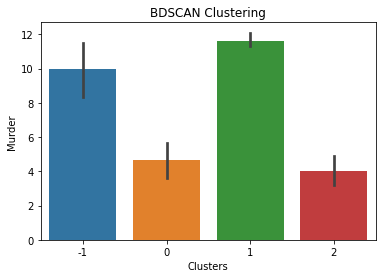

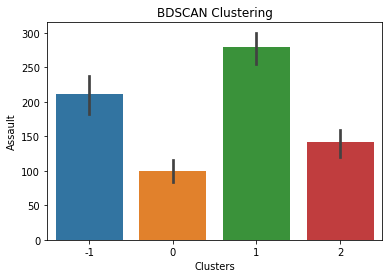

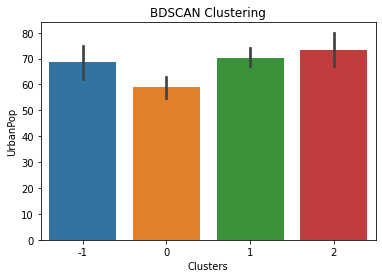

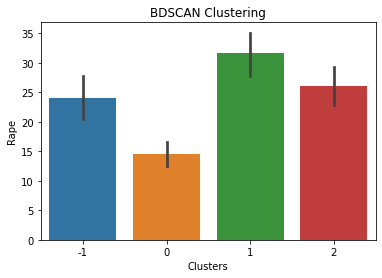

In [1160]:
for i in range(0,4):
    sns.barplot(y=crime_data.iloc[:,i],x=crime_data["DBSCAN_E(0.8)_MS(3)"])
    plt.xlabel("Clusters")
    plt.ylabel(crime_data.columns[i])
    plt.title(f"BDSCAN Clustering")
    plt.show()

In [1161]:
crime_data.to_csv("clustred.csv")

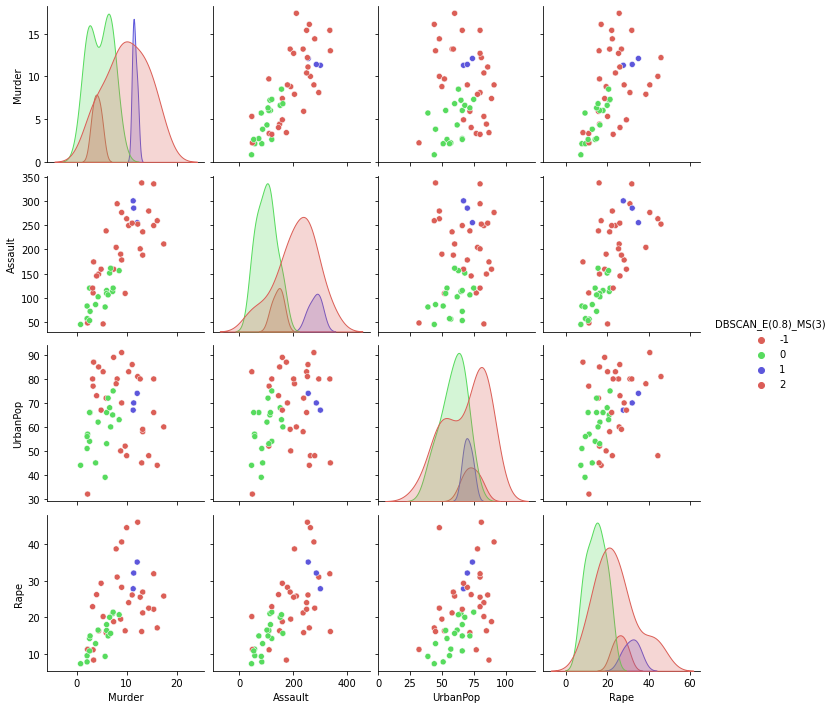

In [1162]:
sns.color_palette("hls", 8)
sns.pairplot(crime_data.drop(columns=["KMeans_4","KMeans_3","Hierar_clusert_K(4)"]),palette="hls",hue="DBSCAN_E(0.8)_MS(3)",)